# Implement Logistic Regression from Scratch

- [book](http://math.ecnu.edu.cn/~lfzhou/seminar/[Joel_Grus]_Data_Science_from_Scratch_First_Princ.pdf) 
- [resource](https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html)
- [logistic regression cost fnction derivative](https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d)
- [source code](https://github.com/bfortuner/ml-glossary/tree/master/code)

In [1]:
import numpy as np

In [2]:
# def sigmoid(x: np.array):
#     return 1/(1+np.exp(-x))

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

## Logistic function property

As its 
- input gets **large and positive**, it gets closer and closer to `1`. 
- As its input gets **large and negative**, it gets closer and closer to `0`.

In [3]:
# sigmoid(np.array([-10])), sigmoid(np.array([0])), sigmoid(np.array([10]))

## Logistic function derivative

![image](https://www.researchgate.net/profile/Farid_Najafi/publication/268874045/figure/fig2/AS:295410393468928@1447442734016/Graph-of-the-dynamic-logistic-function-and-its-derivative-function-for-active-input-range.png)

In [4]:
# def sigmoid_prime(x: np.array):
#     return sigmoid(x)*(1-sigmoid(x))

In [5]:
# sigmoid(np.array([-10,-10])), sigmoid(np.array([0,0])), sigmoid(np.array([10,10]))

In [6]:
# sigmoid_prime(np.array([-10,-10])), sigmoid_prime(np.array([0,0])), sigmoid_prime(np.array([10,10]))

# Loss Function (Cost function)

we use a cost function called **Cross-Entropy**, also known as `Log Loss`. Cross-entropy loss can be divided into two separate cost functions: 
- one for $𝑦=1$
- one for $𝑦=0$

![image](https://ml-cheatsheet.readthedocs.io/en/latest/_images/ng_cost_function_logistic.png)

**Above functions compressed into one**

![image](https://ml-cheatsheet.readthedocs.io/en/latest/_images/logistic_cost_function_joined.png)

**Vectorized cost function**

![image](https://ml-cheatsheet.readthedocs.io/en/latest/_images/logistic_cost_function_vectorized.png)

- [source](https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html)

```py
h = prediction = sigmoid(x@w.T)

x <- dimension 4,3
y <- dimension 4,1
w <- dimension 1,3

h = sigmoid(x@w.T) <- dimesion 4,1
log(h) <- dimension (4,1)
```

$y^T*\log(h)$ <- dimension 1,1

In [7]:
# def predict(X: np.array, w: np.array):
#     '''
#     Returns 1D array of probabilities
#     that the class label == 1
#     '''
#     prob = sigmoid(X@w)
#     return prob

In [8]:
# def loss_fn(y_hat: np.array, y: np.array):
#     '''
#     cost function = NEGATIVE LOG LIKELIHOOD
#     Using Mean Absolute Error

#     y: Labels: (100,1)
#     y_hat: predicted (100, 1)
#     m <- len(y)
#     Cost = (y*log(y_hat) + (1-y)*log(1-y_hat) ) / m
    
#     Returns 1D matrix of predictions
#     '''
#     m = len(y)

#     #Take the error when label=1
#     class1_cost = y*np.log(y_hat)

#     #Take the error when label=0
#     class2_cost = (1-y)*np.log(1-y_hat)

#     #Take the sum of both costs
#     cost = (-1)*(class1_cost + class2_cost)

#     #Take the average cost
#     cost = cost.sum() / m

#     return cost

In [9]:
# X = np.random.rand(4,3)
# y = np.array([1,0,0,1]).reshape(-1, 1)
# w = np.random.rand(3,1)

In [10]:
# y_hat = predict(X, w)
# y_hat
# #loss_fn(y_hat, y)

In [11]:
# y_hat.shape

<center>
    <img src="https://i.ytimg.com/vi/b4Vyma9wPHo/maxresdefault.jpg" width="600">
</center>

## Loss function derivative

![image](https://miro.medium.com/max/289/1*Nr2E9HL-RCDIW78VmBiJyg.png)

```
y_hat - y <- dimension 4,1  # assuming 4 records
X <- feature <- dimension 4,3 # assuming 4 records and each record has 3 feature
```

X.T(y_hat - y) <- dimension 3, 1 # for 3 feature, 3 weight $w_1, \dots, w_3$ ($\theta_1, \dots, \theta_3$) and 3 partial derivatives $\frac{\partial L}{\partial w_1}$, $\frac{\partial L}{\partial w_2}$, $\frac{\partial L}{\partial w_3}$ , but all values put inside a numpy vector

In [12]:
# def loss_fn_grad(X, y, w):
#     """Calculate gradient of the loss function
#     """
#     m = len(y)
#     y_hat = predict(X,w)
#     grad = (X.T @ (y_hat - y))/m
#     return grad

In [13]:
# loss_fn_grad(X, y, w)

# Gradient descent

```py
Repeat {

  1. Calculate gradient average
  2. Multiply by learning rate
  3. Subtract from weights

}
```

In [14]:
# def update_weight(X, y, w, lr=0.01):
#     w -= lr*loss_fn_grad(X, y, w)
#     return w

In [15]:
# def decision_boundary(prob: float):
#     return 1 if prob >= 0.5 else 0

In [16]:
# def train(X, y, w, lr=0.01, epochs=5):
    
#     """
#     Gradient decent algorithm, where at each epoch all the datasets are passed
#     It can be improved by using Stochastic gradient discent 
#     """
    
#     loss_history = []

#     for i in range(epochs):
        
#         y_hat = predict(X, w)
#         loss = loss_fn(y_hat, y)
#         loss_history.append(loss)
        
#         # update weight
#         w = update_weight(X, y, w, lr)

#         # Log Progress
#         if i % 1000 == 0:
#             print("epoch: "+str(i) + " \t loss: "+str(np.round(loss,4)))

#     return w, loss_history

In [17]:
# np.random.choice([0,1], size=(4,1), p=[0.5,0.5])

In [64]:
class myLogisticRegression():
    def __init__(self,lr=0.001, epochs=100):
        self.lr = lr
        self.epochs = epochs
        
    def _init_w(self, X):
        return np.random.rand(X.shape[1],1)
    
    def _sigmoid(self, x: np.array):
        return 1/(1+np.exp(-x))
    
    def _loss_fn_grad(self, X, y, w):
        """Calculate gradient of the loss function
        """
        m = len(y)
        y_hat = self.predict_proba(X)
        grad = (X.T @ (y_hat - y))/m
        return grad
    
    def _loss_fn(self, y_hat: np.array, y: np.array):
        '''
        cost function = NEGATIVE LOG LIKELIHOOD
        Using Mean Absolute Error

        y: Labels: (100,1)
        y_hat: predicted (100, 1)
        m <- len(y)
        Cost = (y*log(y_hat) + (1-y)*log(1-y_hat) ) / m

        Returns 1D matrix of predictions
        '''
        m = len(y)

        #Take the error when label=1
        class1_cost = y*np.log(y_hat)

        #Take the error when label=0
        class2_cost = (1-y)*np.log(1-y_hat)

        #Take the sum of both costs
        loss = (-1)*(class1_cost + class2_cost)

        #Take the average cost
        loss = loss.sum() / m

        return loss
    
    def fit(self, X, y):
    
        """
        Gradient decent algorithm, where at each epoch all the datasets are passed
        It can be improved by using Stochastic gradient discent 
        """

        self.w = self._init_w(X)
        
        loss_history = []

        for i in range(self.epochs):

            y_hat = self.predict_proba(X)
            loss = self._loss_fn(y_hat, y)
            loss_history.append(loss)

            # update weight
            self.w = self._update_weight(X, y, self.w, self.lr)

            # Log Progress
            if i % 1000 == 0:
                print("epoch: "+str(i) + " \t loss: "+str(np.round(loss,4)))

        return loss_history
    
    def _update_weight(self, X, y, w, lr=0.01):
        w -= lr*self._loss_fn_grad(X, y, w)
        return w
    
    def predict_proba(self, X: np.array):
        '''
        Returns 1D array of probabilities
        that the class label == 1
        '''
        prob = self._sigmoid(X@self.w)
        return prob

# Create fake dataset

In [119]:
from sklearn.datasets import make_classification

In [155]:
nr = 8000
nf = 2

In [187]:
X, y = make_classification(n_samples=nr, 
                           n_features=nf, 
                           n_informative=2, 
                           n_redundant=0, 
                           n_repeated=0, 
                           n_clusters_per_class=1)
y = y.reshape(nr, 1)

In [188]:
X.shape, y.shape

((8000, 2), (8000, 1))

In [189]:
import pandas as pd

In [190]:
df = pd.DataFrame(X, columns=["feat_0", "feat_1"])
df["target"] = y
df.head()

,feat_0,feat_1,target
0,0.691460,-1.190131,0
1,0.267731,-0.971202,0
2,-0.490911,-0.790665,0
3,0.023421,-0.159541,0
4,-0.001328,-0.223384,0


In [191]:
import seaborn as sns

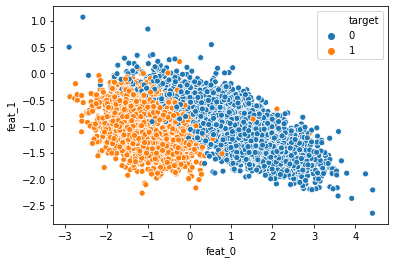

In [192]:
sns.scatterplot(data=df, x="feat_0", y="feat_1", hue="target");

# Train model

In [193]:
mlr = myLogisticRegression(lr = 0.001, epochs=30000)

In [194]:
loss_history = mlr.fit(X,y)

epoch: 0 	 loss: 1.0717
epoch: 1000 	 loss: 0.7131
epoch: 2000 	 loss: 0.5375
epoch: 3000 	 loss: 0.4462
epoch: 4000 	 loss: 0.3933
epoch: 5000 	 loss: 0.36
epoch: 6000 	 loss: 0.3374
epoch: 7000 	 loss: 0.3212
epoch: 8000 	 loss: 0.3093
epoch: 9000 	 loss: 0.3001
epoch: 10000 	 loss: 0.293
epoch: 11000 	 loss: 0.2872
epoch: 12000 	 loss: 0.2825
epoch: 13000 	 loss: 0.2786
epoch: 14000 	 loss: 0.2754
epoch: 15000 	 loss: 0.2726
epoch: 16000 	 loss: 0.2703
epoch: 17000 	 loss: 0.2683
epoch: 18000 	 loss: 0.2665
epoch: 19000 	 loss: 0.265
epoch: 20000 	 loss: 0.2636
epoch: 21000 	 loss: 0.2624
epoch: 22000 	 loss: 0.2614
epoch: 23000 	 loss: 0.2605
epoch: 24000 	 loss: 0.2596
epoch: 25000 	 loss: 0.2589
epoch: 26000 	 loss: 0.2582
epoch: 27000 	 loss: 0.2576
epoch: 28000 	 loss: 0.257
epoch: 29000 	 loss: 0.2566


In [195]:
#w_hat, loss_history = train(X, y, w, lr = 0.005, epochs=20000)

# Plot loss

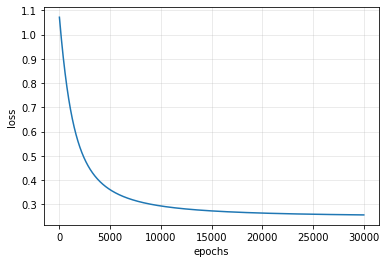

In [196]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid(alpha=0.3)
plt.show()

## Predict with my model

In [202]:
test_input= X[7].reshape(1,-1)

In [203]:
class_1_prob = mlr.predict_proba(test_input)
class_0_prob = 1 - class_1_prob
np.array([class_0_prob, class_1_prob]).reshape(1,-1)

array([[0.49994884, 0.50005116]])

# Train with Sklearn to compare

In [204]:
from sklearn.linear_model import LogisticRegression

In [205]:
clf = LogisticRegression(random_state=0).fit(X, y.ravel())

## Predict with sklearn

In [206]:
clf.predict_proba(test_input)

array([[0.12171109, 0.87828891]])